<a href="https://colab.research.google.com/github/sk27110/basic_ml_hse/blob/task_2_intro_ml/homework_02_knn_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 2: kNN и линейная регрессия

Задание выполнил(а):

    Кочетков Александр

## Общая информация

__Внимание!__  

* Домашнее задание выполняется самостоятельно
* Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов
* Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов
* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе

Вес каждого задания указан рядом с номером задания.  
Всего в сумме можно получить, если правильно решить все задания, **8 баллов**.

## Задание 1:  Визуализация решающих поверхностей в kNN (3.5 балла)

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html).

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования. Используйте [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

In [ ]:
print(X.isna().sum().sum())
print(X.info())

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: 

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

Используйте аргумент `stratify` при разбиении. Почему это важно?

In [ ]:
from sklearn.model_selection import train_test_split

np.random.seed(10)

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=10, stratify=y)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
normalizer = StandardScaler()
normalizer.fit(Xtrain)
Xtrain_norm = normalizer.transform(Xtrain)
Xtest_norm = normalizer.transform(Xtest)
Xtrain_norm = pd.DataFrame(Xtrain_norm, columns=Xtrain.columns)
Xtest_norm = pd.DataFrame(Xtest_norm, columns=Xtest.columns)

clf = KNeighborsClassifier(n_neighbors=1, p=2, n_jobs=10)
clf.fit(Xtrain_norm[['alcohol', 'magnesium']], ytrain)
ypred = clf.predict(Xtest_norm[['alcohol', 'magnesium']])

print("NN", "Train", "Test")

models = []

for k in [1,3,5,10,15,25]:
    clf = KNeighborsClassifier(n_neighbors=k, p=2, n_jobs=10)
    clf.fit(Xtrain_norm[['alcohol', 'magnesium']], ytrain)
    y_train_pred = clf.predict(Xtrain_norm[['alcohol', 'magnesium']])
    y_test_pred = clf.predict(Xtest_norm[['alcohol', 'magnesium']])
    train_acc = accuracy_score(ytrain, y_train_pred)
    test_acc = accuracy_score(ytest, y_test_pred)
    models.append(clf)
    print(k, f" {train_acc:.2f}", f" {test_acc:.2f}")



NN Train Test
1  1.00  0.59
3  0.79  0.65
5  0.74  0.69
10  0.74  0.74
15  0.71  0.74
25  0.73  0.76


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [ ]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [ ]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов.
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново.
6. Построение графика может занять некоторое время – придётся немного подождать!

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/pytho

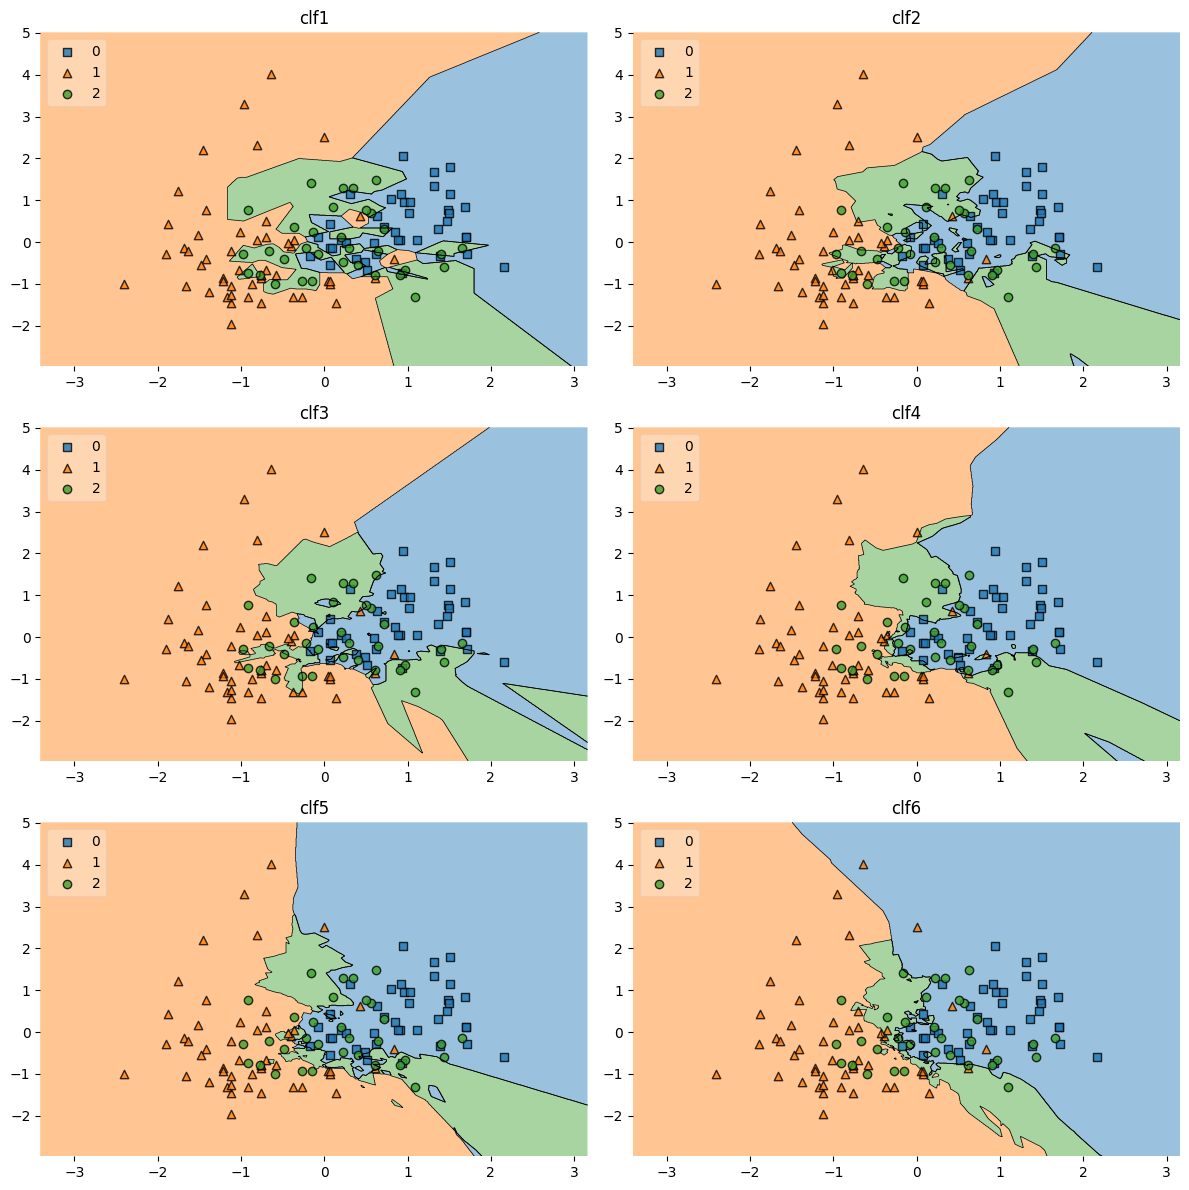

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(3, 2)

fig = plt.figure(figsize=(12,12))

labels = ['clf1', 'clf2', 'clf3', 'clf4', 'clf5', 'clf6']
for clf, lab, grd in zip(models,
                         labels,
                         itertools.product([0, 1, 2], [0,1])):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=Xtrain_norm[['alcohol', 'magnesium']].to_numpy(), y=ytrain, clf=clf, legend=2)
    plt.title(lab)

plt.tight_layout()
plt.show()


**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности. Какие из результатов явно говорят о переобучении модели? Почему?

Модели clf1, clf2 и clf3 (1, 3 и 5 соседей соответственно) явно переобучены, так как их графики очень рваные, в центре признаки сильно перемешаны.
В clf6 (25 соседей) синий цвет явно съедает часть ораньжевого
Я думаю, что лучшей моделью будет clf4 (10 соседей), так как там синий цвет не съедает ораньжевый, зеленый цвет не такой рваный.

## Задание 2. KNN своими руками (3 балла)

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

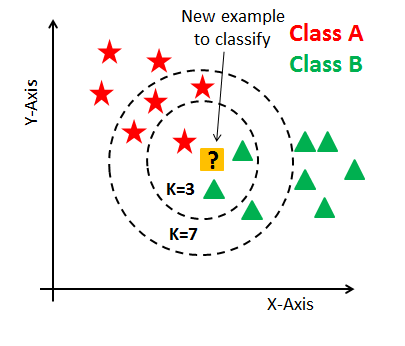

In [ ]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k:int):
        self.k = k

    def fit(self, X, y):
      self.Xtrain = X
      self.ytrain = y

    def predict(self, X):
      prediction = []
      for t in X:
        dist = [self.count_distance(t, x) for x in self.Xtrain]
        k_ind = np.argsort(dist)[:self.k]
        k_nearest_labels = [self.ytrain[i] for i in k_ind]
        most_common = Counter(k_nearest_labels).most_common(1)
        prediction.append(most_common[0][0])
      return np.array(prediction)

    def count_distance(self, x, y):
      return np.sqrt(np.sum((x - y) ** 2))

In [ ]:
# Не меняйте код в ячейке!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [ ]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

## Задание 3: Линейная регрессия (3.5 балла)

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [ ]:
DIAMONDS = 'https://raw.githubusercontent.com/evgpat/datasets/main/diamonds.csv'

In [ ]:
data = pd.read_csv(DIAMONDS)
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.2 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их.
Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
data.isna().sum().sum()
data.drop('Unnamed: 0', inplace = True, axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Задача 3.2 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [ ]:
data.select_dtypes(include='number').corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Больше всего коррелирет 'carat'

**Задача 3.3 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
categorial =  data.select_dtypes(include=['object', 'category']).columns

ohe.fit(data[categorial])

encoded_data = ohe.transform(data[categorial])
encoded_columns = ohe.get_feature_names_out(categorial)
encoded_data = pd.DataFrame(encoded_data, columns = encoded_columns)
encoded_data = pd.concat([data.drop(categorial, axis=1), encoded_data], axis=1)
encoded_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Задача 3.4 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3. Не забудьте про параметр `stratify`.

In [ ]:
from sklearn.utils import shuffle
X = encoded_data.drop('price', axis=1)
y = np.round(encoded_data['price']/20)*20
X, y = shuffle(X, y, random_state=0) # без перемешивания в предпредпоследнем задании если посмотреть на матрицу mse, то там будет большой разброс от 100000 до 1200000
# y = encoded_data['price']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

**Задача 3.5 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [ ]:
from sklearn.preprocessing import StandardScaler

normalizer = StandardScaler()
Xtrain_scaled = pd.DataFrame(normalizer.fit_transform(Xtrain), columns = Xtrain.columns)
Xtest_scaled = pd.DataFrame(normalizer.transform(Xtest), columns = Xtest.columns)

**Задача 3.6 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

model.fit(Xtrain_scaled, ytrain)

y_train_predict = model.predict(Xtrain_scaled)
y_test_predict = model.predict(Xtest_scaled)

r2_train = r2_score(ytrain, y_train_predict)
r2_test = r2_score(ytest, y_test_predict)
mse_train = mean_squared_error(ytrain, y_train_predict)
mse_test = mean_squared_error(ytest, y_test_predict)

print("r2_score train predict:", r2_train)
print("r2_score test predict:", r2_test)
print("MSE train predict:", mse_train)
print("MSE test predict:", mse_test)

r2_score train predict: 0.9177250971227325
r2_score test predict: 0.9244648017311832
MSE train predict: 1311638.255823325
MSE test predict: 1197601.0936334059


**Задача 3.7 (0.2 балла)** Изучите [документацию](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [ ]:
for i,j in zip(Xtrain_scaled.columns , model.coef_):
  print(i,':',j)

carat : 5264.383090780196
depth : -83.58938663020353
table : -54.11541499500217
x : -1112.5572354349924
y : 63.97110643180645
z : -27.498549130719432
cut_Fair : -131.08588692464062
cut_Good : -48.71179938184185
cut_Ideal : 54.16157549908135
cut_Premium : 20.00139868000525
cut_Very Good : 2.714124939511677
color_D : 208.38309000683537
color_E : 164.04029165980913
color_F : 136.2536146595206
color_G : 58.849710752318245
color_H : -126.27684576366127
color_I : -252.21977023064935
color_J : -389.2224107126557
clarity_I1 : -483.94633103896274
clarity_IF : 241.62135687815172
clarity_SI1 : -149.263545072388
clarity_SI2 : -492.2229726990231
clarity_VS1 : 205.0654413571092
clarity_VS2 : 108.8312747048309
clarity_VVS1 : 251.190081803049
clarity_VVS2 : 276.08274916741505


Такие переменные -- 'carat' и 'x'

**Задача 3.8 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом.

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией.

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [ ]:
from sklearn.linear_model import Lasso, Ridge

lasso_model = Lasso(alpha=10)
lasso_model.fit(Xtrain_scaled, ytrain)

y_lasso_train_predict = lasso_model.predict(Xtrain_scaled)
y_lasso_test_predict = lasso_model.predict(Xtest_scaled)

mse_lasso_train = mean_squared_error(ytrain, y_lasso_train_predict)
mse_lasso_test = mean_squared_error(ytest, y_lasso_test_predict)
r2_lasso_train = r2_score(ytrain, y_lasso_train_predict)
r2_lasso_test = r2_score(ytest, y_lasso_test_predict)

ridge_model = Ridge(alpha=10)
ridge_model.fit(Xtrain_scaled, ytrain)

y_ridge_train_predict = ridge_model.predict(Xtrain_scaled)
y_ridge_test_predict = ridge_model.predict(Xtest_scaled)

mse_ridge_train = mean_squared_error(ytrain, y_ridge_train_predict)
mse_ridge_test = mean_squared_error(ytest, y_ridge_test_predict)
r2_ridge_train = r2_score(ytrain, y_ridge_train_predict)
r2_ridge_test = r2_score(ytest, y_ridge_test_predict)

print("Lasso Regression:")
print("Mean Squared Error on Train:", mse_lasso_train)
print("Mean Squared Error on Test:", mse_lasso_test)
print("R^2 Score on Train:", r2_lasso_train)
print("R^2 Score on Test:", r2_lasso_test)
for i,j in zip(Xtrain_scaled.columns , lasso_model.coef_):
  print(i,':',j)
print("nRidge Regression:")
print("Mean Squared Error on Train:", mse_ridge_train)
print("Mean Squared Error on Test:", mse_ridge_test)
print("R^2 Score on Train:", r2_ridge_train)
print("R^2 Score on Test:", r2_ridge_test)
for i,j in zip(Xtrain_scaled.columns , ridge_model.coef_):
  print(i,':',j)

Lasso Regression:
Mean Squared Error on Train: 1323011.8775692235
Mean Squared Error on Test: 1217242.0021084608
R^2 Score on Train: 0.917011665945842
R^2 Score on Test: 0.9232260086775279
carat : 4799.889414572505
depth : -51.06246226511938
table : -40.03641473852927
x : -596.1781625749347
y : -0.0
z : -36.68059264620502
cut_Fair : -134.5796712454034
cut_Good : -51.726834898917026
cut_Ideal : 42.37824420932007
cut_Premium : 0.0
cut_Very Good : -0.0
color_D : 143.30471360748828
color_E : 92.02030391791685
color_F : 64.09303179926685
color_G : -0.0
color_H : -171.0890063854326
color_I : -281.9889827291167
color_J : -404.9025007399487
clarity_I1 : -501.01054344543314
clarity_IF : 188.8198346143862
clarity_SI1 : -261.42285067678057
clarity_SI2 : -580.534658295648
clarity_VS1 : 98.81444104892978
clarity_VS2 : -0.0
clarity_VVS1 : 180.61415666284398
clarity_VVS2 : 193.87546870824698
nRidge Regression:
Mean Squared Error on Train: 1311704.2002421115
Mean Squared Error on Test: 1198352.1190325

Как мы видим, веса немного уменьшились для модели Lasso и почти не изменились для Ridge. Значит, проблема мультиколлинеарности слабо проявлялась в первой модели.

**Задача 3.9 (0.4 балла)** Как обсуждалось на занятиях, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.537e+08, tolerance: 6.019e+07
  model = cd_fast.enet_coordinate_descent(


1311641.417721889
1311822.4721168943
1323011.8775692235
1558931.3786039778
1984436.736776513


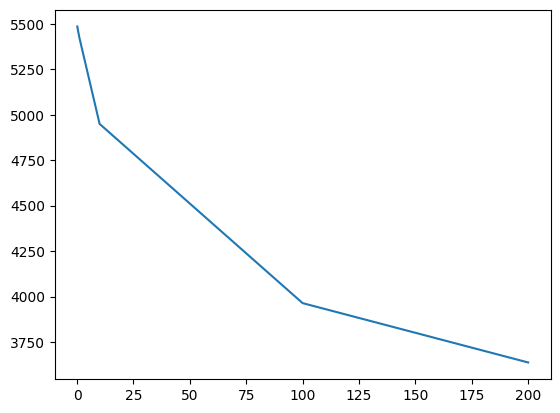

In [ ]:
alpha = [0.1, 1, 10, 100, 200]
lasso_norm = []

for a in alpha:
  model = Lasso(a)
  model.fit(Xtrain_scaled, ytrain)
  lasso_norm.append(np.linalg.norm(model.coef_))
  print(mean_squared_error(ytrain, model.predict(Xtrain_scaled))) #для интереса

plt.plot(alpha, lasso_norm)
plt.show()

1311638.262645025
1311638.9358536443
1311704.2002421115
1316744.5893092784
1328106.4330088866


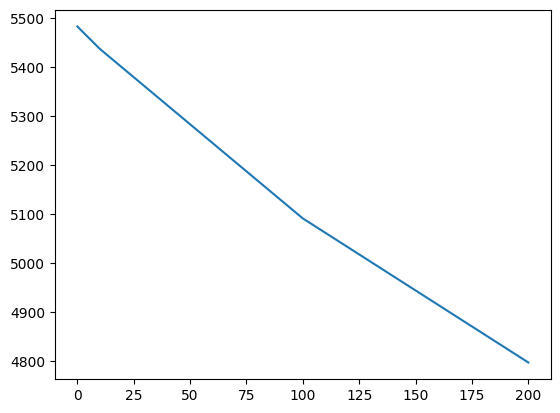

In [ ]:
alpha = [0.1, 1, 10, 100, 200]
ridge_norm = []


for a in alpha:
  model = Ridge(a)
  model.fit(Xtrain_scaled, ytrain)
  ridge_norm.append(np.linalg.norm(model.coef_))
  print(mean_squared_error(ytrain, model.predict(Xtrain_scaled)))

plt.plot(alpha, ridge_norm)
plt.show()

Lasso агрессивнее снижает веса, так как . Lasso используют для отбора признаков, так как быстрее снижает веса ненужных коэффицентов и может занулять коеффиценты у ненужных признаков. Так можно понять, какие признаки важные а какие нет.

**Задача 3.10 (0.5 балла)**
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке.

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`.

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество.

In [ ]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

normalizer = StandardScaler()
X_scaled = pd.DataFrame(normalizer.fit_transform(X), columns = X.columns)

lasso_models = LassoCV(alphas=alpha, cv=5)
lasso_models.fit(X_scaled, y)

mean_mse = [np.mean(i) for i in lasso_models.mse_path_]
alphas = lasso_models.alphas_
for i,j in zip(alphas, mean_mse):
  print('a:',i, "MSE:",j)

lasso_models.mse_path_

a: 200.0 MSE: 1950594.8231586367
a: 100.0 MSE: 1530611.7146774516
a: 10.0 MSE: 1289341.8728616359
a: 1.0 MSE: 1278534.714234969
a: 0.1 MSE: 1279647.9863753994


array([[1923459.99124484, 1977257.37514768, 1971444.28438688,
        1940373.61242028, 1940438.8525935 ],
       [1513334.80512608, 1559129.2051223 , 1533293.03507425,
        1517100.59987329, 1530200.92819134],
       [1265290.89648793, 1327711.38494752, 1283116.57637673,
        1271636.37421483, 1298954.13228116],
       [1249156.21264125, 1320995.72572734, 1269481.9645987 ,
        1267765.04129749, 1285274.62691007],
       [1248519.05661114, 1321204.42895526, 1269169.65804271,
        1274588.54092948, 1284758.2473384 ]])

Наименьшее среднее MSE получается при a=1.0

**Задача 3.11 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [ ]:
model = Lasso(alpha=1)

model.fit(Xtrain_scaled, ytrain)
print("MSE:", mean_squared_error(model.predict(Xtest_scaled), ytest))
for i,j in zip(model.coef_, Xtrain_scaled.columns):
  print(j,i)

MSE: 1197988.618928422
carat 5220.07697870611
depth -81.07961232293194
table -52.91687569699797
x -1008.4271254334345
y 0.0
z -25.535040778705614
cut_Fair -138.61994911355657
cut_Good -60.05080546131097
cut_Ideal 33.82069181548574
cut_Premium 0.0
cut_Very Good -13.336650018990063
color_D 158.8997623383209
color_E 106.81269360223635
color_F 79.70295826429401
color_G -0.0
color_H -177.5764801817126
color_I -294.407741459298
color_J -419.7376026116132
clarity_I1 -513.4057891415557
clarity_IF 195.15735389925283
clarity_SI1 -260.5017343267429
clarity_SI2 -588.6432624578293
clarity_VS1 111.11101835300953
clarity_VS2 -0.0
clarity_VVS1 185.1856514450699
clarity_VVS2 199.8481088003843


Самые информативные признаки -- это carat и x. Их веса больше всего. Это можно объяснить тем, что чем больше алмаз, тем он реже встречается и соответственно дороже. Не информативные признаки -- y, z, table, depth

**Задача 3.12 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [ ]:
lasso_pred = model.predict(Xtest_scaled)
MSE_lasso = mean_squared_error(lasso_pred, ytest)
print("MSE Lasso:" ,MSE_lasso)
print("MSE reg:", 1197601.0936334059)

MSE Lasso: 1197988.618928422
MSE reg: 1197601.0936334059


Две модели дают примерно одинаковый результат, обычная регрессия даже немного лучше. Возможно, Lasso регрессия слишком сильно занизила веса некоторых признаков. Об этом может говорить и то, что с уменьшением a качество модели повыгшалось.